# Hierarchical Clustering

## Task 1

In this section we will download articles from wikipedia and then cluster them into groups in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)

https://wikipedia.readthedocs.io/en/latest/code.html#api

In [ ]:
# !pip install wikipedia

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11695 sha256=5605b1b6de108abf271e21beb9bb585c96bc8a2152a4e08002f89d236cee3ba1
  Stored in directory: /root/.cache/pip/wheels/15/93/6d/5b2c68b8a64c7a7a04947b4ed6d89fb557dcc6bc27d1d7f3ba
Successfully built wikipedia


In [ ]:
### importing dependencies ###

import wikipedia
from wikipedia.exceptions import WikipediaException
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import numpy as npm

In [ ]:
'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", 
 "Artificial intelligence", "Data science", "Master in Data Science", "Bank of America", "Visa Inc.", 
 "European Central Bank", "Bank", "Financial technology","International Monetary Fund", "Basketball", 
 "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

topics = ["Northeastern Unversity", "Natural language processing", "Quantum machine learning", 
          "Artificial intelligence", "Data science", "Master in Data Science", 
          "European Central Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Football", "College Football", "Association Football"]

# download and store all the articles in this variable
data=[]
for title in topics:
  try:
    data.append(wikipedia.page(title).content)
  except WikipediaException:
    print(f"error when searching for {title}")


## Task 2

In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean_review function from Assignment 1

**Answer(1-3 sentences):** Why are you (or not) choosing to clean the data? Think in terms of whether cleaning the data will help in the clustering or not.

I am choosing to clean the data as clustering is very sensitive to noise and outliers. Thus, I have chosen to do a few preprocessing steps to the data. 

In [ ]:
# You can use Assignment 1's clean message function
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
import string
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')



def clean_message(review):
 
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    # Converting the reviews to lowercase
    review_cleaned = review.lower()

    # Removing HTML patterns like <br />
    html_pattern = re.compile('<.*?>')
    review_cleaned = html_pattern.sub(r'', review_cleaned) 

    # Removing url's if any in the code
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    review_cleaned = url_pattern.sub(r'', review_cleaned)

    # List of stop words
    stop_words = set(stopwords.words('english')) 

    # Tokenizing the words while removing punctuations 
    tokenizer = RegexpTokenizer(r'\w+')
    tokenwords = tokenizer.tokenize(review_cleaned) 
    
    # Removing stop words using the list created above
    result = [] 
    for w in tokenwords: 
      if w not in stop_words: 
        result.append(w)
    
    # Lemmatizing the words
    # Performing lemmatization instead of suggested stemming as lemmatization improved the accuracy of the model
    lemmatizer = WordNetLemmatizer()
    review_cleaned = [lemmatizer.lemmatize(w) for w in result]

    # ps = PorterStemmer()
    # review_cleaned = [ps.stem(w) for w in result]

    # Joining the list of words back into a string
    review_cleaned = " ".join(review_cleaned)

    return review_cleaned


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
clean_message(data[0])

'northeastern university nu neu private research university main campus boston established 1898 university offer undergraduate graduate program main campus well satellite campus charlotte north carolina seattle washington san jose california oakland california portland maine toronto vancouver canada 2019 northeastern purchased new college humanity london england university enrollment approximately 19 000 undergraduate student 8 600 graduate student classified among r1 doctoral university high research activity northeastern faculty alumnus include nobel prize laureate rhodes truman marshall scholar undergraduate admission university categorized selective northeastern feature cooperative education program commonly known co op integrates classroom study professional experience includes 3 100 partner across seven continent program key part northeastern curriculum experiential learning hundred year one largest co op internship program world required academic discipline participation nearly 

In [ ]:
cleaned_data = []
for i in data:
  cleaned = clean_message(i)
  cleaned_data.append(cleaned)

## Task 3

In this step, we will vectorize the text data to use in hierarchical clustering. You can use countVectorizer() or TfidfVectorizer() from sklearn library.

In [ ]:
### vectorize the dataset using count vectorizer or tfidf vectorizer and store the vectors in a separate variable
from sklearn.feature_extraction.text import TfidfVectorizer
vecs = TfidfVectorizer(stop_words={'english'})
X = vecs.fit_transform(cleaned_data)
X

<14x9420 sparse matrix of type '<class 'numpy.float64'>'
	with 20755 stored elements in Compressed Sparse Row format>

## Task 4

Plot the Dendrogram and try to see the heirarchical relationships between articles.

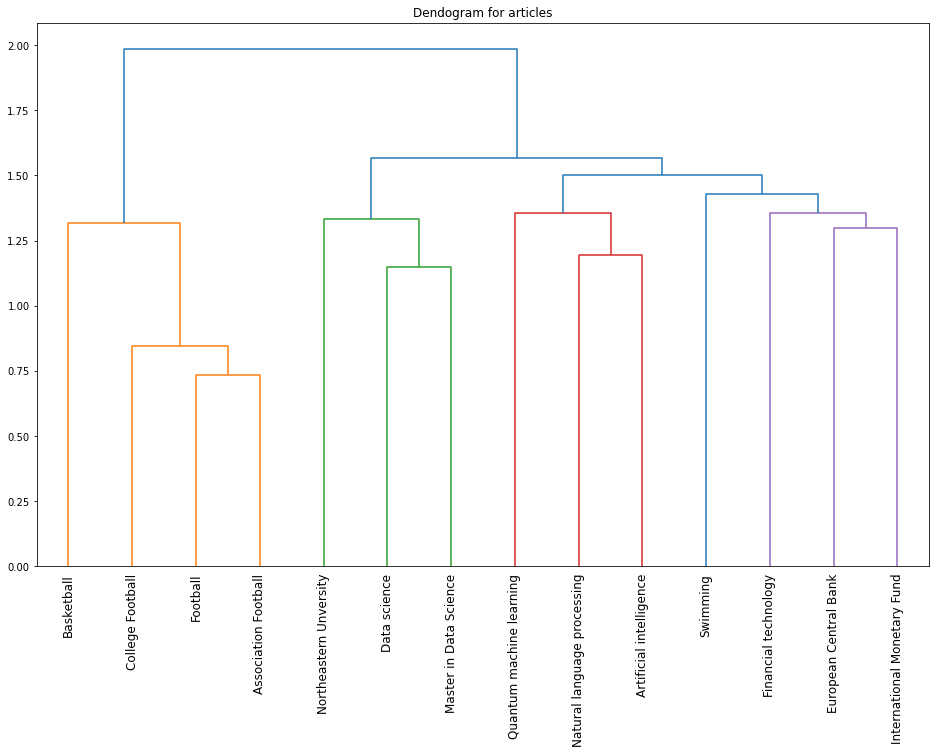

In [ ]:
### importing the dependencies for dendrogram plotting ###
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc

### plot the dendrogram

plt.figure(figsize=(16, 10)) 
plt.title("Dendogram for articles")
dend = shc.dendrogram(shc.linkage(X.todense(), method='ward'),labels=topics, leaf_rotation=90.)

### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

## Task 4

In this step, we will assign cluster lables to each document/group using Agglomerative Hierarchical clustering.
We can decide number of clusters based on the dendogram and our requirement (how many categories we want).(eg. n_clusters = 3) 

In [ ]:
### importing dependencies for agglomerative clustering ###
from sklearn.cluster import AgglomerativeClustering

### perform agglomerative clustering on the vectors

clustering = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward').fit(X.toarray())
AgglomerativeClustering()
labels=clustering.labels_
print(labels)
### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

[2 1 1 1 2 2 0 0 0 3 0 3 3 3]


In [ ]:
wiki_cl=pd.DataFrame(list(zip(topics,labels)),columns=['title','cluster'])
print(wiki_cl)

                          title  cluster
0        Northeastern Unversity        2
1   Natural language processing        1
2      Quantum machine learning        1
3       Artificial intelligence        1
4                  Data science        2
5        Master in Data Science        2
6         European Central Bank        0
7          Financial technology        0
8   International Monetary Fund        0
9                    Basketball        3
10                     Swimming        0
11                     Football        3
12             College Football        3
13         Association Football        3


## Task 5

Now, we will try to visualize top 50 words in each cluster using word clouds

Cluster: 0
Titles
      European Central Bank
       Financial technology
International Monetary Fund
                   Swimming


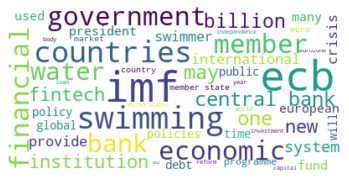

Cluster: 1
Titles
Natural language processing
   Quantum machine learning
    Artificial intelligence


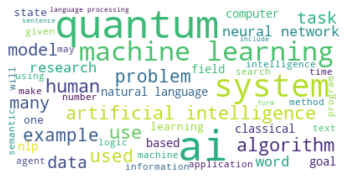

Cluster: 2
Titles
Northeastern Unversity
          Data science
Master in Data Science


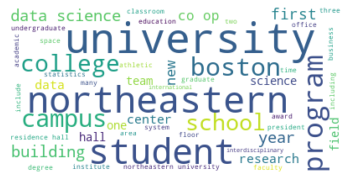

Cluster: 3
Titles
          Basketball
            Football
    College Football
Association Football


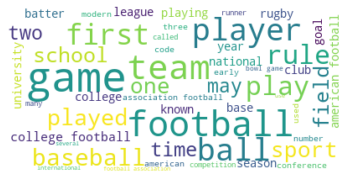

In [ ]:
### importing dependencies for plotting clusters using wordcloud ###
from wordcloud import WordCloud
result={'cluster':labels,'wiki':data}
result=pd.DataFrame(result)
for k in range(0,4):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=50, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']         
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()

### Below output is just for your reference purposes.
###Your output is not going to be the same as the output provided below as the list of articles is going to be different  

***Question*** : Comment on the clusters formed above. Does they make any sense?

I have set the number of clusters to be 4. And the clusters formed above are making sense. We can observe that all sports related topics like college football, basketball, etc are clustered together. While NLP and AI are clustered together. Northeastern University is clubbed along with Data Sciene topics. And Financial topics are observed in a single cluster. However, the clustering is not perfect where in swimming is found along with the financial topics, but the hierarchical clustering has done a pretty good job in categorising most of the topics. 